In [3]:
import matplotlib.pyplot as plt

In [10]:
delays = [1.021306402886857700e+00,
          1.564572974477664413e+00,
          2.125550669918624180e+00,
          2.722099102593145137e+00,
          3.345542478605223469e+00,
          4.043577756298062376e+00,
          4.796135347978081498e+00,
          5.601350145922054047e+00,
          6.484263666320964958e+00,
          7.440179591947816640e+00,
          8.446268707345407023e+00,
          9.527926647449930897e+00,
          1.070270212627042206e+01,
          1.196211013545381974e+01,
          1.329153401528470191e+01,
          1.471894305559706062e+01,
          1.622820089757806628e+01,
          1.781869724705977376e+01,
          1.948230735915936052e+01,
          2.125213781036149996e+01]

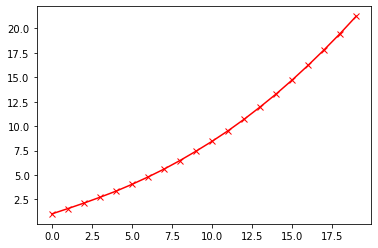

In [11]:
plt.plot(delays, 'xr-')

In [8]:
mean_arrival_interval = 60
mean_packet_size = 120
bitrate = 60
netsize = [i+1 for i in range(20)]

In [12]:
def get_analytic_delay_mm1(mean_arrival_interval, mean_packet_size, bitrate, netsize):
    _lambda, _mu = 1 / mean_arrival_interval, bitrate / mean_packet_size
    rho = netsize * _lambda / _mu
#     t = rho / (1 - rho) * 1 /(netsize * _lambda)
    return rho / (1 - rho) * 1 /(netsize * _lambda)

In [13]:
a_delays = [get_analytic_delay_mm1(mean_arrival_interval, mean_packet_size, bitrate, i) for i in netsize]

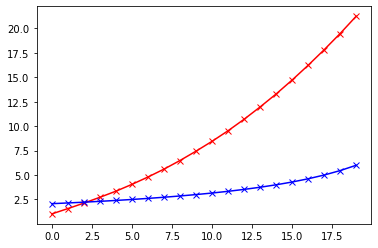

In [16]:
plt.plot(delays, 'xr-')
plt.plot(a_delays, 'xb-')

Prepare input data


{
  "STA_WHERE_PACKETS_ARRIVE": -1,
  "SIMULATION_TYPE" : "FIXED_PACKET_SIZE",
  "NUM_GENERATED_PACKETS": 100000,
  "MODE": "UPLOAD",
  "NUM_STATIONS" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  "BITRATE": [50],
  "QUEUE_CAPACITY": [7],
  "MEAN_ARRIVAL_TIME": [50, 53, 55],
  "STD_ARRIVAL_TIME": [50, 52, 55],
  "MEAN_PACKET_SIZE": [208, 209, 211, 214],
  "STD_PACKET_SIZE": [208, 209, 211, 214]
}

In [83]:
import json
import numpy as np
import math
def prepare_inputs():
    with open('../input_test.json') as json_file:
        data = json.load(json_file)
        return data
        
data = prepare_inputs()

In [28]:
data


{'STA_WHERE_PACKETS_ARRIVE': -1,
 'SIMULATION_TYPE': 'FIXED_PACKET_SIZE',
 'NUM_GENERATED_PACKETS': 100000,
 'MODE': 'UPLOAD',
 'NUM_STATIONS': [1, 10],
 'BITRATE': [50, 55],
 'QUEUE_CAPACITY': [7, 10],
 'MEAN_ARRIVAL_TIME': [50, 60],
 'STD_ARRIVAL_TIME': [50, 60],
 'MEAN_PACKET_SIZE': [208, 220],
 'STD_PACKET_SIZE': [208, 220]}

In [104]:
SAMPLE_NUM = 20000
swpa = np.zeros(SAMPLE_NUM)
simtype = [None]*SAMPLE_NUM
numgenp = np.zeros(SAMPLE_NUM)
mode = [None]*SAMPLE_NUM
num_sta = np.zeros(SAMPLE_NUM)
bitrate = np.zeros(SAMPLE_NUM)
qcapacity = np.zeros(SAMPLE_NUM)
mean_a = np.zeros(SAMPLE_NUM)
std_a = np.zeros(SAMPLE_NUM)
mean_size = np.zeros(SAMPLE_NUM)
std_size = np.zeros(SAMPLE_NUM)

column = ["STA_WHERE_PACKETS_ARRIVE", "SIMULATION_TYPE",
              "NUM_GENERATED_PACKETS", "MODE", "NUM_STATIONS", "BITRATE",
              "QUEUE_CAPACITY", "MEAN_ARRIVAL_TIME", "STD_ARRIVAL_TIME",
              "MEAN_PACKET_SIZE", "STD_PACKET_SIZE"]

mass = [0]*SAMPLE_NUM
for i in range(SAMPLE_NUM):
    swpa[i] = data['STA_WHERE_PACKETS_ARRIVE']
    simtype[i] = data['SIMULATION_TYPE']
    numgenp[i] = data['NUM_GENERATED_PACKETS']
    mode[i] = data['MODE']
    num_sta[i] = np.random.randint(data['NUM_STATIONS'][0], 
                                   data['NUM_STATIONS'][-1] + 1)
    bitrate[i] = round(np.random.uniform(data['BITRATE'][0],
                                   data['BITRATE'][-1] + 1), 3)
    qcapacity[i] = round(np.random.randint(data['QUEUE_CAPACITY'][0],
                                     data['QUEUE_CAPACITY'][-1]), 3)
    mean_a[i] = round(np.random.uniform(data['MEAN_ARRIVAL_TIME'][0],
                                  data['MEAN_ARRIVAL_TIME'][-1]), 3)
    std_a[i] = round(np.random.uniform(data['STD_ARRIVAL_TIME'][0],
                                 data['STD_ARRIVAL_TIME'][-1]), 3)
    mean_size[i] = round(np.random.uniform(data['MEAN_PACKET_SIZE'][0],
                                  data['MEAN_PACKET_SIZE'][-1]), 3)
    std_size[i] = round(np.random.uniform(data['STD_PACKET_SIZE'][0],
                                 data['STD_PACKET_SIZE'][-1]), 3)

    mass[i] = dict(zip(column, (swpa[i],
                                simtype[i],
                                int(numgenp[i]),
                                mode[i],
                                int(num_sta[i]),
                                bitrate[i],
                                int(qcapacity[i]),
                                mean_a[i],
                                std_a[i],
                                mean_size[i],
                                std_size[i])))

In [105]:
mass

[{'STA_WHERE_PACKETS_ARRIVE': -1.0,
  'SIMULATION_TYPE': 'FIXED_PACKET_SIZE',
  'NUM_GENERATED_PACKETS': 100000,
  'MODE': 'UPLOAD',
  'NUM_STATIONS': 1,
  'BITRATE': 54.667,
  'QUEUE_CAPACITY': 7,
  'MEAN_ARRIVAL_TIME': 54.843,
  'STD_ARRIVAL_TIME': 55.219,
  'MEAN_PACKET_SIZE': 212.531,
  'STD_PACKET_SIZE': 213.836},
 {'STA_WHERE_PACKETS_ARRIVE': -1.0,
  'SIMULATION_TYPE': 'FIXED_PACKET_SIZE',
  'NUM_GENERATED_PACKETS': 100000,
  'MODE': 'UPLOAD',
  'NUM_STATIONS': 1,
  'BITRATE': 54.942,
  'QUEUE_CAPACITY': 7,
  'MEAN_ARRIVAL_TIME': 59.497,
  'STD_ARRIVAL_TIME': 50.097,
  'MEAN_PACKET_SIZE': 212.599,
  'STD_PACKET_SIZE': 209.155},
 {'STA_WHERE_PACKETS_ARRIVE': -1.0,
  'SIMULATION_TYPE': 'FIXED_PACKET_SIZE',
  'NUM_GENERATED_PACKETS': 100000,
  'MODE': 'UPLOAD',
  'NUM_STATIONS': 6,
  'BITRATE': 54.249,
  'QUEUE_CAPACITY': 8,
  'MEAN_ARRIVAL_TIME': 57.772,
  'STD_ARRIVAL_TIME': 54.869,
  'MEAN_PACKET_SIZE': 211.489,
  'STD_PACKET_SIZE': 217.911},
 {'STA_WHERE_PACKETS_ARRIVE': -1.0,
 

In [95]:
a = 1.61
b = 1.55
c = a / b
v = round(c,)


In [97]:
math.isclose(a, b, rel_tol=0.1)

True